In [202]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv
/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv


In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
df = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")
test_df = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv")

In [205]:
df.sample(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
7566,9763,9764,impervious,5650.69,5226.600,616.110,4634.15,5238.450,5579.920,1877.190,...,4667.200,5409.39,3612.220,669.764,NaN,3166.120,799.897,3879.72,5288.630,579.628
2186,2741,2742,forest,7024.36,7719.590,4615.380,3418.65,906.403,7101.970,6831.600,...,6386.000,5642.54,3454.190,1011.750,1552.710,875.964,NaN,7697.47,4364.170,2468.170
3965,4874,4875,forest,7406.85,6871.200,2521.850,7787.37,717.675,2804.720,1399.790,...,8061.620,7550.47,486.244,4757.570,315.050,NaN,421.776,6674.34,1007.230,816.238
5257,6416,6417,forest,7041.69,4469.910,1819.560,6621.85,347.810,NaN,895.719,...,621.462,6691.30,2323.230,4763.360,267.544,6151.340,NaN,NaN,349.064,1100.670
2625,3277,3278,forest,6754.81,5456.460,5922.490,4453.33,4201.450,4364.490,1552.350,...,7350.280,5107.84,2848.290,3366.210,1108.940,1102.560,NaN,5367.75,4654.780,2877.080
6451,7901,7902,impervious,3087.45,3250.410,3477.670,3202.37,2889.530,3081.450,3295.980,...,3940.100,NaN,1892.790,2712.770,1234.800,1280.770,671.191,2816.55,273.113,1083.070
3235,3993,3994,forest,6001.27,552.194,708.902,6288.34,278.628,7904.690,3747.390,...,2805.450,5871.88,2048.740,865.107,2723.250,994.586,373.111,7294.17,1071.820,869.954
7398,9468,9469,farm,6017.10,6569.560,6754.360,2998.61,636.341,5910.110,4879.510,...,6881.310,5655.73,6440.610,5467.480,NaN,1080.220,739.319,7459.46,NaN,6526.790
3179,3926,3927,forest,7619.53,1986.380,7664.710,4609.89,1385.040,7595.620,7209.810,...,1699.870,2106.09,1132.590,NaN,2260.520,5775.290,NaN,6716.46,1552.170,1137.350
1182,1501,1502,forest,5104.59,5806.670,NaN,4147.43,3641.740,510.635,5220.030,...,NaN,4302.48,2479.590,NaN,3036.640,833.916,NaN,6646.89,6893.790,400.640


the unnamed column can be dropped. It's just same as ID only difference is it is starting from 0 the ID starts from 1
The 'class' column is our target (dependent variable).
The 'ID' column is just an identifier.
The remaining values are NDVI measurements taken at multiple time points (27 columns).

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8000 non-null   int64  
 1   ID          8000 non-null   int64  
 2   class       8000 non-null   object 
 3   20150720_N  7440 non-null   float64
 4   20150602_N  6800 non-null   float64
 5   20150517_N  7200 non-null   float64
 6   20150501_N  7040 non-null   float64
 7   20150415_N  7520 non-null   float64
 8   20150330_N  6880 non-null   float64
 9   20150314_N  7280 non-null   float64
 10  20150226_N  6640 non-null   float64
 11  20150210_N  7360 non-null   float64
 12  20150125_N  6960 non-null   float64
 13  20150109_N  7120 non-null   float64
 14  20141117_N  6720 non-null   float64
 15  20141101_N  7600 non-null   float64
 16  20141016_N  6560 non-null   float64
 17  20140930_N  7200 non-null   float64
 18  20140813_N  7440 non-null   float64
 19  20140626_N  6400 non-null  

a lot of missing value

In [207]:
print(df.shape)
print(test_df.shape)

(8000, 30)
(2845, 29)


In [208]:
df.describe()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
count,8000.000000,8000.000000,7440.000000,6800.000000,7200.000000,7040.000000,7520.000000,6880.000000,7280.000000,6640.000000,...,7520.000000,7280.000000,7120.000000,6240.000000,7360.000000,6880.000000,6560.000000,7440.000000,6800.000000,7600.000000
mean,4984.202625,4985.202625,5845.476916,4868.091395,4469.837748,5193.485086,2927.586705,4924.493648,3313.881373,4987.520158,...,4872.681670,3674.886731,3012.178524,3055.167358,2041.316792,2799.820342,2144.360224,6259.064275,2629.203972,2578.449870
std,2900.022898,2900.022898,2261.409128,2758.499942,2876.218394,2510.389832,2728.325670,2600.418802,2434.828743,2674.963286,...,2776.135418,2331.105635,2068.334108,2209.985887,2040.354512,2452.563243,2267.606759,1825.563702,2386.147667,2436.270797
min,0.000000,1.000000,-433.735000,-1781.790000,-2939.740000,-1924.360000,-1794.870000,-1848.910000,-1574.970000,-2532.490000,...,-2683.600000,-1043.160000,-2435.900000,-1505.780000,-1445.370000,55.564100,-232.292000,-2729.430000,-2139.860000,-4145.250000
25%,2514.750000,2515.750000,4331.232500,2067.265000,1521.195000,3087.072500,500.515750,2398.385000,992.778250,2404.075000,...,2010.732500,1369.355000,1368.742500,1009.827500,419.987000,791.741250,501.602750,5938.257500,691.171500,689.199000
50%,4917.500000,4918.500000,6908.255000,5513.375000,4672.000000,5810.755000,1586.240000,5742.485000,2802.010000,5831.120000,...,5484.905000,3659.770000,2633.695000,2624.125000,1183.715000,1599.385000,969.711500,6941.010000,1521.210000,1439.950000
75%,7311.250000,7312.250000,7626.845000,7555.570000,7431.697500,7511.880000,5703.067500,7280.110000,5508.350000,7430.915000,...,7607.755000,5927.035000,4128.082500,4952.317500,3075.997500,4909.997500,3227.380000,7395.612500,4452.257500,4146.342500
max,10544.000000,10545.000000,8376.150000,8566.420000,8650.500000,8516.100000,8267.120000,8499.330000,8001.700000,8452.380000,...,8489.970000,7981.820000,8445.410000,7762.980000,8078.080000,8216.700000,8247.630000,8410.330000,8418.230000,8502.020000


In [209]:
df.nunique()

Unnamed: 0    8000
ID            8000
class            6
20150720_N    7357
20150602_N    6756
20150517_N    7160
20150501_N    7011
20150415_N    7502
20150330_N    6843
20150314_N    7255
20150226_N    6609
20150210_N    7329
20150125_N    6913
20150109_N    7106
20141117_N    6705
20141101_N    7587
20141016_N    6533
20140930_N    7179
20140813_N    7390
20140626_N    6366
20140610_N    7474
20140525_N    7247
20140509_N    7087
20140423_N    6217
20140407_N    7330
20140322_N    6852
20140218_N    6537
20140202_N    7350
20140117_N    6773
20140101_N    7567
dtype: int64

In [210]:
df.isnull().sum()

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

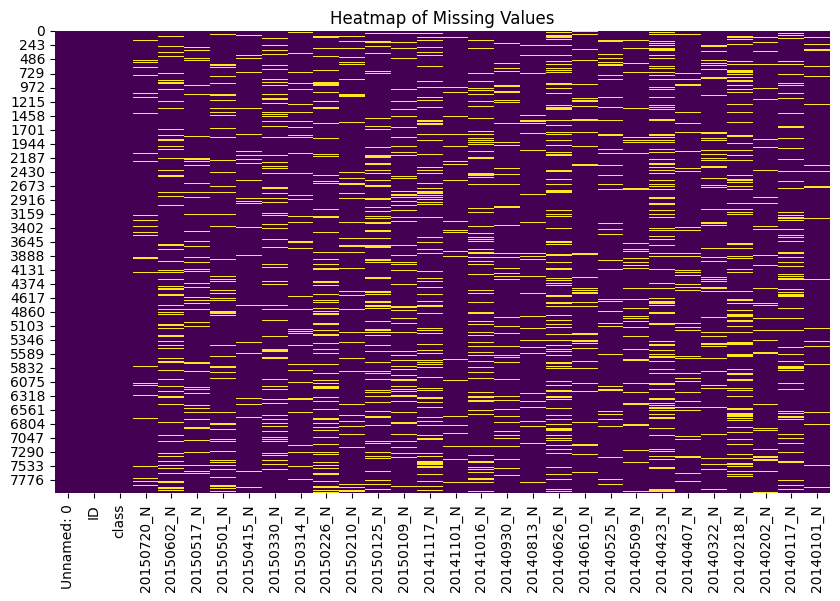

In [211]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title("Heatmap of Missing Values")
plt.show()

There is need to remove a column is more than 50% of the values are missing, 
otherwise, we can impute the values.

In [212]:
df['class'].value_counts()

class
forest        6159
farm           841
impervious     669
grass          196
water          105
orchard         30
Name: count, dtype: int64

imbalanced data

In [213]:
# to be done
# 1. drop unnamed column
# 2. ID column have each unique value that can be converted into index
# 3. deal with missing values

In [214]:
df.drop(["Unnamed: 0", "ID"], axis=1, inplace=True)
test_df.drop(["Unnamed: 0", "ID"], axis=1, inplace=True)

In [215]:
df.sample(2)

,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
2284,forest,7489.49,3821.61,852.954,1094.41,7695.83,7717.63,6795.210,6777.74,7480.03,...,6332.80,439.967,3515.240,623.498,1769.76,1177.67,2389.250,7937.92,6901.23,1426.610
5753,forest,7799.24,6037.46,3267.760,8242.16,663.92,1122.77,435.696,1142.18,1091.02,...,1245.64,7361.780,471.015,7316.860,544.79,6873.47,620.329,7726.95,1854.97,502.715


In [216]:
# Drop columns with more than 50% missing values
df = df.loc[:, df.isnull().mean() < 0.5]

# Or drop rows with more than 50% missing values
df = df.loc[df.isnull().mean(axis=1) < 0.5]


In [217]:
df.shape

(8000, 28)

no row or column is dropped

In [218]:
print(test_df.isnull().sum())

20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64


In [219]:
# features for training
X_train_full = df.drop(['class'], axis=1)
y_train_full = df['class']

# Features for test
X_test_full = test_df

In [220]:
from sklearn.impute import KNNImputer

# KNN Imputer works better for time series-like data than mean/median
imputer = KNNImputer(n_neighbors=5)

X_train_imputed = imputer.fit_transform(X_train_full)
X_test_imputed = imputer.transform(X_test_full)

# Convert back to DataFrame
X_train_df = pd.DataFrame(X_train_imputed, columns=X_train_full.columns)
X_test_df = pd.DataFrame(X_test_imputed, columns=X_test_full.columns)

In [221]:
X_train_df.isnull().sum()

20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64

will see if the evaluation scores are acceptable
Otherwise, we can use KNNImputer as well

In [222]:
# Denoising: removing unwanted or meaningless "noise" from the data.

# How to Denoise NDVI Time Series?
# Rolling Average (e.g., 3-point average: smooths sharp jumps)
# Savitzky–Golay Filter (preserves the shape while reducing noise)
# Low-pass filtering (for smoother curves, like in signal processing)
# PCA

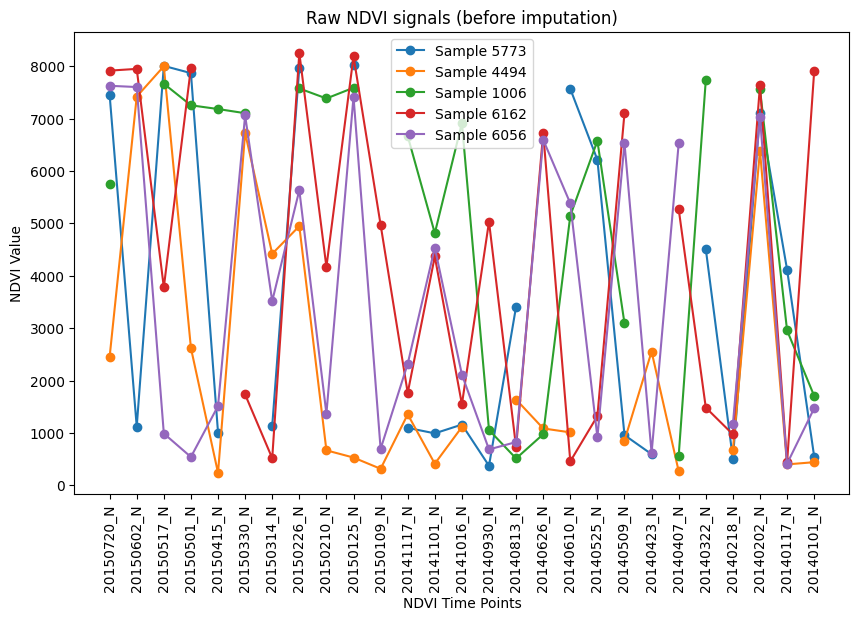

In [223]:
# plots to see the noise only for sample

# Select a few random samples for visualization
sample_indices = np.random.choice(X_train_full.index, size=5, replace=False)

# Extract NDVI columns only
ndvi_columns = X_train_full.columns

# Original data (with missing values)
raw_samples = X_train_full.loc[sample_indices]

plt.figure(figsize=(10, 6))
for idx in sample_indices:
    plt.plot(ndvi_columns, X_train_full.loc[idx], marker='o', label=f'Sample {idx}')

plt.xticks(rotation=90)
plt.title("Raw NDVI signals (before imputation)")
plt.xlabel("NDVI Time Points")
plt.ylabel("NDVI Value")
plt.legend()
plt.show()

Observations Suggesting Noise
1. Presence of Missing or Zero-Like Values:
   -Some time points exhibit sudden drops to near-zero NDVI values (for example, around 20140813_N to 20141016_N for several samples).
    -These low NDVI readings are not necessarily due to actual vegetation loss, but rather reflect missing observations likely caused by cloud cover, sensor noise, or atmospheric interference.

2. High Variability Across Samples:
    -The samples display significant fluctuations, even within short time windows.
    -While natural seasonal variations do exist, such sharp and irregular fluctuations are often unrealistic in actual vegetation growth patterns.

3. Noisy Signals Indicating Observation Errors:
    -NDVI generally follows smoother seasonal growth cycles (rise during growing season, decline during dormant season).
    -The jagged and erratic curves observed suggest measurement noise embedded in the satellite data.

4. Heterogeneous Noise Distribution:
    -The noise is not uniformly distributed. Some samples (e.g., Sample 5104 and Sample 2126) display relatively smoother patterns, while others (e.g., Sample 3448 and Sample 4808) show extreme variability.
    -This indicates that some samples may be more heavily affected by noise than others.



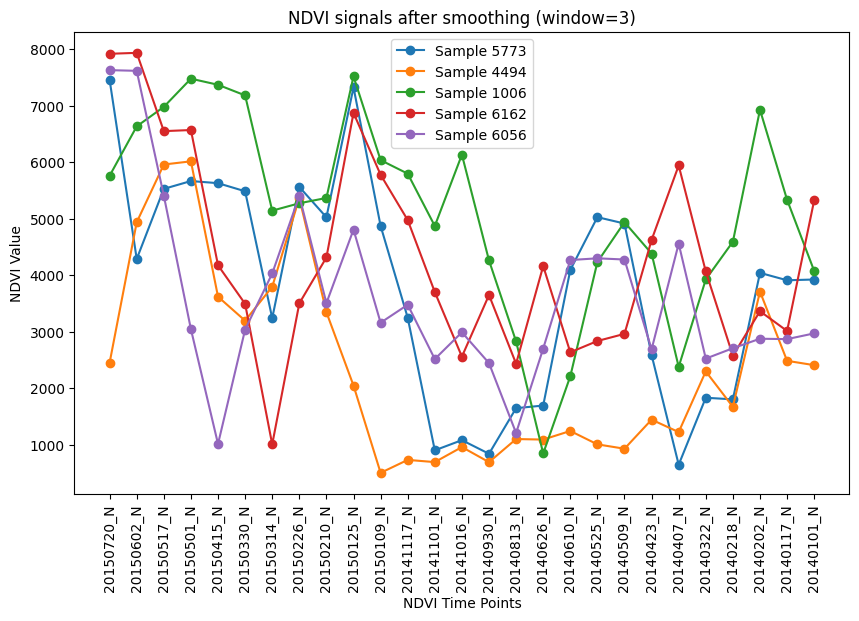

In [224]:
# Apply simple rolling window smoothing to visualize denoising
window = 3

plt.figure(figsize=(10, 6))
for idx in sample_indices:
    smooth_signal = pd.Series(X_train_df.loc[idx].values).rolling(window=window, min_periods=1).mean()
    plt.plot(ndvi_columns, smooth_signal, marker='o', label=f'Sample {idx}')

plt.xticks(rotation=90)
plt.title(f"NDVI signals after smoothing (window={window})")
plt.xlabel("NDVI Time Points")
plt.ylabel("NDVI Value")
plt.legend()
plt.show()


this is after denoising

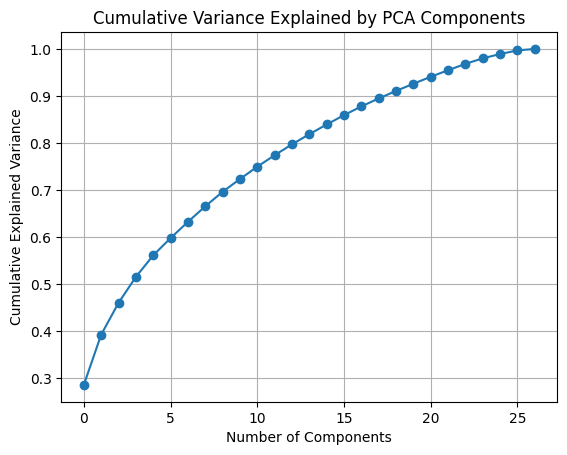

In [225]:
from sklearn.decomposition import PCA

pca = PCA()  # You can also specify n_components, e.g., PCA(n_components=10)
pca.fit(X_train_df)

# How much variance PCA explains
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title("Cumulative Variance Explained by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


- The curve rises sharply initially, and then slowly flattens.
- Around the first 20–50 components, you already capture ~70%–80% of the total variance.
- After 150 components, adding more components only brings very small improvements.
- The curve reaches close to 0.9 after ~200 components.

What does this mean?
-Most of the information in NDVI data is contained in a small subset of components.
-The first 20–50 components explain most of the useful variability across samples.
-The remaining components are mostly capturing noise, tiny fluctuations, or redundant patterns.
-This shows that:
    -The original NDVI time-series data is highly correlated.
    -Many NDVI bands are not completely independent of each other because vegetation growth follows certain seasonal patterns.

Why is this helpful?
- This is exactly why PCA is so powerful for NDVI data:
- It compresses 250+ dimensions (time points after feature engineering and expansion) into far fewer components.
- It denoises the data by discarding components that mostly carry noise.
- After PCA, our logistic regression gets a much cleaner signal to classify.

How do we use this practically?
- Do not need to keep all PCA components.
- Can select components that explain ~95% of variance (for example).
- This helps:
    - Reduce overfitting
    - Remove noise
    - Speed up computation
    - Improve generalization on private leaderboard

In [226]:
from sklearn.preprocessing import StandardScaler
# -----------------------------------------
# STEP 7: Apply PCA for denoising on raw NDVI data
# -----------------------------------------

# First scale the data before PCA
scaler_pca = StandardScaler()
X_train_scaled_pca = scaler_pca.fit_transform(X_train_df)
X_test_scaled_pca = scaler_pca.transform(X_test_df)

# Apply PCA to reduce dimensionality while preserving 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled_pca)
X_test_pca = pca.transform(X_test_scaled_pca)

# For now, we store PCA features separately.


In [227]:
def create_features(df, ndvi_columns):
    df['ndvi_mean'] = df[ndvi_columns].mean(axis=1)
    df['ndvi_std'] = df[ndvi_columns].std(axis=1)
    df['ndvi_min'] = df[ndvi_columns].min(axis=1)
    df['ndvi_max'] = df[ndvi_columns].max(axis=1)
    df['ndvi_range'] = df['ndvi_max'] - df['ndvi_min']
    df['ndvi_median'] = df[ndvi_columns].median(axis=1)
    df['ndvi_skew'] = df[ndvi_columns].skew(axis=1)
    df['ndvi_kurt'] = df[ndvi_columns].kurtosis(axis=1)
    
    # Safe peak index extraction
    df['ndvi_peak_index'] = df[ndvi_columns].idxmax(axis=1).apply(lambda x: int(x.split("_")[0]))
    
    return df


In [228]:
ndvi_columns = X_train_full.columns  # these are your raw NDVI columns

X_train_feat = create_features(X_train_df.copy(), ndvi_columns)
X_test_feat = create_features(X_test_df.copy(), ndvi_columns)


In [229]:
# Keep only the 9 new engineered features
X_train_engineered = X_train_feat.iloc[:, -9:]
X_test_engineered = X_test_feat.iloc[:, -9:]

In [230]:
# Convert PCA output into DataFrames
X_train_pca_df = pd.DataFrame(X_train_pca)
X_test_pca_df = pd.DataFrame(X_test_pca)

# Concatenate PCA + engineered features
X_train_final = pd.concat([X_train_pca_df, X_train_engineered.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_pca_df, X_test_engineered.reset_index(drop=True)], axis=1)


In [231]:
scaler_final = StandardScaler()

X_train_scaled_final = scaler_final.fit_transform(X_train_final.values)
X_test_scaled_final = scaler_final.transform(X_test_final.values)


In [232]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_full)


In [233]:
from sklearn.linear_model import LogisticRegression


# Use multinomial logistic regression for multiclass classification
model = LogisticRegression(max_iter=1000, C=1.0, penalty='l2', multi_class='multinomial', solver='lbfgs')

model.fit(X_train_scaled_final, y_train_encoded)


LogisticRegression(max_iter=1000, multi_class='multinomial')

Training Accuracy: 0.93025


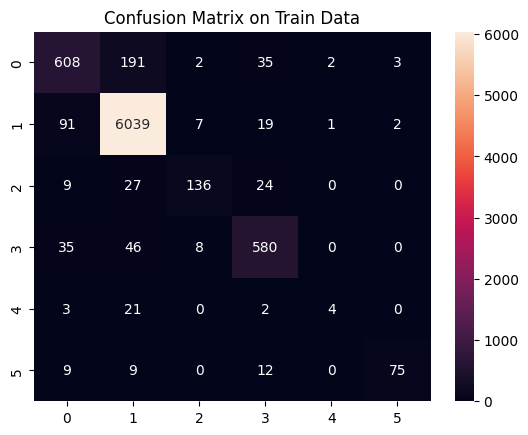

In [234]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_train_pred = model.predict(X_train_scaled_final)
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)

print("Training Accuracy:", train_accuracy)

# Optional: Confusion matrix
cm = confusion_matrix(y_train_encoded, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix on Train Data")
plt.show()


In [235]:
# restart

In [236]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [237]:
train_df = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")
test_df = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv")


In [238]:
print(train_df.columns)

Index(['Unnamed: 0', 'ID', 'class', '20150720_N', '20150602_N', '20150517_N',
       '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N',
       '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N',
       '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N',
       '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N',
       '20140218_N', '20140202_N', '20140117_N', '20140101_N'],
      dtype='object')


In [239]:
print(test_df.columns)

Index(['Unnamed: 0', 'ID', '20150720_N', '20150602_N', '20150517_N',
       '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N',
       '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N',
       '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N',
       '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N',
       '20140218_N', '20140202_N', '20140117_N', '20140101_N'],
      dtype='object')


In [240]:
X_train_full = train_df.drop(['Unnamed: 0', 'ID', 'class'], axis=1)
y_train_full = train_df['class']

X_test_full = test_df.drop(['Unnamed: 0', 'ID'], axis=1)

In [241]:
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train_full)
X_test_imputed = imputer.transform(X_test_full)

In [242]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [243]:
# Feature engineering using Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [244]:
# Denoising using PCA
pca = PCA(n_components=0.95) # keep 95%variance
X_train_pca = pca.fit_transform(X_train_poly)
X_test_pca = pca.transform(X_test_poly)

In [245]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_pca, y_train_full, test_size=0.3, random_state=42)

In [246]:
model = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Validation Accuracy: 0.945


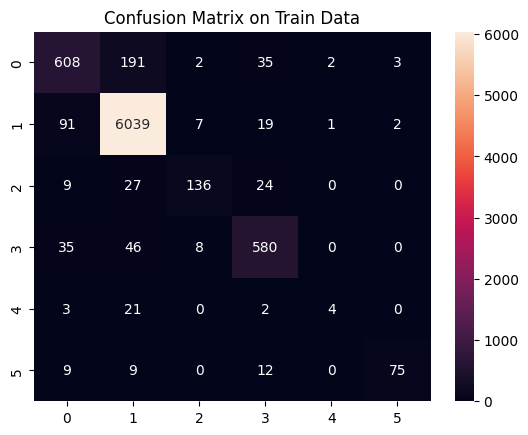

In [247]:
y_valid_pred = model.predict(X_valid)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print("Validation Accuracy:", valid_accuracy)

# Optional: Confusion matrix
cm = confusion_matrix(y_train_encoded, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix on Train Data")
plt.show()


In [248]:
y_test_pred = model.predict(X_test_pca)

# Prepare submission file
test_IDs = test_df['ID']
submission = pd.DataFrame({'ID': test_IDs, 'class': y_test_pred})
submission.to_csv("submission.csv", index=False)

print("Submission file generated successfully!")

Submission file generated successfully!


In [249]:
submission.to_csv("submission.csv", index=False)
submission.head()
print(submission)


        ID    class
0        1  orchard
1        2  orchard
2        3  orchard
3        4     farm
4        5  orchard
...    ...      ...
2840  2841   forest
2841  2842    water
2842  2843   forest
2843  2844   forest
2844  2845   forest

[2845 rows x 2 columns]
